**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Soner Yıldırım, Bex T, Manuel Hupperich, Youssef Hosni and Piero Paialunga en www.towardsdatascience.com. Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
levels = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv', parse_dates=['Date'], index_col='Date')
levels.head()

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9


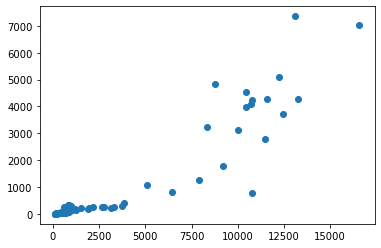

In [7]:
plt.scatter(levels.DJI, levels.UFO);

In [3]:
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

Correlation of levels:  0.9204594155244163


In [8]:
# Compute correlation of percent changes
changes = levels.pct_change()
changes.head()

,DJI,UFO
Date,,
1941-01-01,NaN,NaN
1942-01-01,0.076063,1.0
1943-01-01,0.138107,3.5
1944-01-01,0.120907,0.0
1945-01-01,0.266478,0.0


In [9]:
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of changes:  0.009287288259357323


## Regresión Lineal

In [10]:
# Compute correlation of x and y

data = levels.dropna()
x = data['DJI']
y = data['UFO']

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))


The correlation between x and y is 0.92


c:\Users\usuario\miniconda3\envs\timeseries\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DJI', ylabel='UFO'>

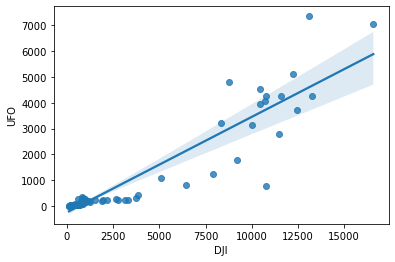

In [14]:
import seaborn as sbn
sbn.regplot(x,y)

In [12]:
# Import the statsmodels module
import statsmodels.api as sm

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y.values, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     393.8
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.10e-30
Time:                        15:07:35   Log-Likelihood:                -581.51
No. Observations:                  73   AIC:                             1167.
Df Residuals:                      71   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -247.2650    105.184     -2.351      0.0

In [16]:
correlation*correlation

0.8472455356275501

## Autocorrelation function

In [18]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

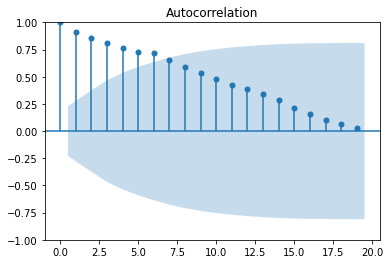

In [19]:

# Plot the acf function
plot_acf(data['DJI'], alpha=0.05)
plt.show()